In [45]:
##Бешенная лошадь!##

In [1]:
fname = "data.txt"

In [7]:
with open(fname) as f: 
    nx,ny = [int(p) for p in f.readline().split()] ##размеры поля
    hx,hy = [int(p) for p in f.readline().split()] ##координаты коня
    ex,ey = [int(p) for p in f.readline().split()] ##координаты жрачки
begin = [hx, hy, 0]

In [8]:
def myappend(steps, n_steps):
    t = True
    for i in range(len(n_steps)):
        tx, ty, level = n_steps[i]
        if tx>0 and ty>0 and t:
            steps.append([tx, ty, level])
    return steps


def possible_step(X):      #находим координаты коня на след ходе, которые должны быть неотрицательны
    kx, ky, level = X
    ans_normal = []
    ans = [[kx-2,ky-1],[kx-2,ky+1],[kx-1,ky+2],[kx-1,ky-2],[kx+1,ky+2],[kx+1,ky-2],[kx+2,ky+1],[kx+2,ky-1]]
    for i in range(len(ans)):
        tx, ty = ans[i]
        
        if (tx>0 and ty>0)and(tx!=hx or ty!=hy)and(tx<=nx and ty<=ny):
            arg = [[tx, ty, level+1]]
            myappend(ans_normal, arg)
    return(ans_normal)

In [12]:
list_of_steps = []
list_of_steps = myappend(list_of_steps, possible_step(begin))
i,j = 0,0
f = True
print(list_of_steps,'========')
while(f==True):
    #print(list_of_steps, j, '----\n')

    if list_of_steps[j][0]==ex and list_of_steps[j][1]==ey:
        print('stop! ',list_of_steps[j][2], list_of_steps[j], f)
        f = False    
    print(list_of_steps,'--------\n')

    for j in range(len(list_of_steps)):
        tx, ty, lev = list_of_steps[j]
        if list_of_steps[j][0]==ex and list_of_steps[j][1]==ey:
            f = False
            print(list_of_steps[j])
            break
        else:
            list_of_steps = myappend(list_of_steps, possible_step(list_of_steps[j]))
    j=j+1
    
    

    
   

[[2, 3, 1], [3, 2, 1]] ========
[[2, 3, 1], [3, 2, 1]] --------

[[2, 3, 1], [3, 2, 1], [1, 5, 2], [3, 5, 2], [3, 1, 2], [4, 4, 2], [4, 2, 2], [1, 3, 2], [2, 4, 2], [4, 4, 2], [5, 3, 2], [5, 1, 2]] --------

[[2, 3, 1], [3, 2, 1], [1, 5, 2], [3, 5, 2], [3, 1, 2], [4, 4, 2], [4, 2, 2], [1, 3, 2], [2, 4, 2], [4, 4, 2], [5, 3, 2], [5, 1, 2], [1, 5, 2], [3, 5, 2], [3, 1, 2], [4, 4, 2], [4, 2, 2], [1, 3, 2], [2, 4, 2], [4, 4, 2], [5, 3, 2], [5, 1, 2], [2, 7, 3], [2, 3, 3], [3, 6, 3], [3, 4, 3], [1, 4, 3], [1, 6, 3], [2, 7, 3], [2, 3, 3], [4, 7, 3], [4, 3, 3], [5, 6, 3], [5, 4, 3], [1, 2, 3], [2, 3, 3], [4, 3, 3], [5, 2, 3], [2, 3, 3], [2, 5, 3], [3, 6, 3], [3, 2, 3], [5, 6, 3], [5, 2, 3], [6, 5, 3], [6, 3, 3], [2, 1, 3], [2, 3, 3], [3, 4, 3], [5, 4, 3], [6, 3, 3], [6, 1, 3], [2, 5, 3], [2, 1, 3], [3, 4, 3], [3, 2, 3], [1, 6, 3], [1, 2, 3], [3, 6, 3], [3, 2, 3], [4, 5, 3], [4, 3, 3], [2, 3, 3], [2, 5, 3], [3, 6, 3], [3, 2, 3], [5, 6, 3], [5, 2, 3], [6, 5, 3], [6, 3, 3], [3, 2, 3], [3, 4, 3],

In [148]:
import numpy

field = [0] * ny
        
for i in range(nx):
    field[i] = [0] * ny

for i in range(nx):
    for j in range(ny):
        field[i][j]=0    
    
for i in range(len(list_of_steps)):
    x, y, z = list_of_steps[i]
    if field[x - 1][y - 1]==0:
        field[x - 1][y - 1] = z

field[ex-1][ey-1]

4

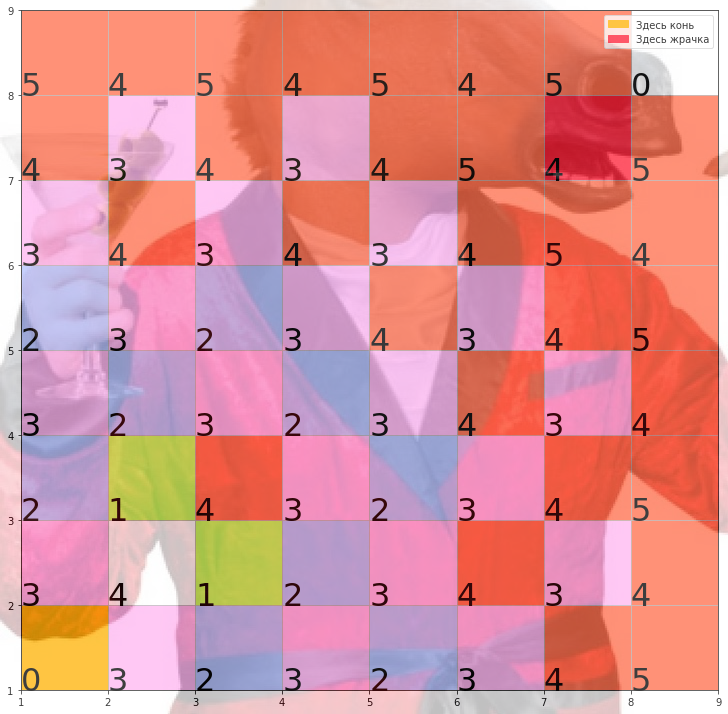

In [74]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as Rectangle
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(nx):
    for j in range(ny):
        if field[i][j] == 0:
            col = '#fff2b7'
        if field[i][j] == 1:
            col = '#c2ff5c'  
        if field[i][j] == 2:
            col = '#b5c3ff'
        if field[i][j] == 3:
            col = '#ffb6f1'
        if field[i][j] == 4:
            col = '#ff6d4b'
        
        rect = matplotlib.patches.Rectangle((i+1, j+1), 1, 1, color=col)
        if (i==hx and j==hy)or(i==ex and j==ey):
            rect1 = matplotlib.patches.Rectangle((hx, hy), 1, 1, color='#ffb305')
            rect2 = matplotlib.patches.Rectangle((ex, ey), 1, 1, color='#ff2037')
            ax.add_patch(rect1)
            ax.add_patch(rect2)
        else:
            ax.add_patch(rect)
        plt.text(i+1,j+1,str(field[i][j]),fontsize=32) 
        #line = ax.plot(X, Y, color='blue', linewidth=2)
       

fn = (r'horse.jpg')

im = plt.imread(fn)
im = im 
ax.figure.figimage(im,
                   0,
                   0,
                   alpha=0.25, zorder=1, resize = 0.08)


patch1 = mpatches.Patch(color='#ffb305', label='Здесь конь')
patch2 = mpatches.Patch(color='#ff2037', label='Здесь жрачка')
plt.legend(handles=[patch1, patch2])

ax.grid(True)
plt.xlim([1, nx+1])
plt.ylim([1, ny+1])

plt.show() 




